In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/2nd_project_elice

/content/drive/MyDrive/2nd_project_elice


In [3]:
# !pip install kaggle
# from google.colab import files
# files.upload()

In [4]:
# ls -1ha kaggle.json

In [5]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# # Permission Warning 이 일어나지 않도록 
# !chmod 600 ~/.kaggle/kaggle.json
# # 본인이 참가한 모든 대회 보기 
# !kaggle competitions list

In [6]:
# ls

In [7]:
# !kaggle competitions download -c h-and-m-personalized-fashion-recommendations

In [8]:
# !unzip h-and-m-personalized-fashion-recommendations.zip

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [10]:
ls

 articles.csv   'h&m.ipynb'  'kaggle (1).json'         Untitled0.ipynb
 customers.csv   images/      transactions_train.csv


In [11]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")

In [12]:
pd.set_option('display.max_columns', None)
articles.head(20)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [13]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [15]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [16]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [17]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [18]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [19]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

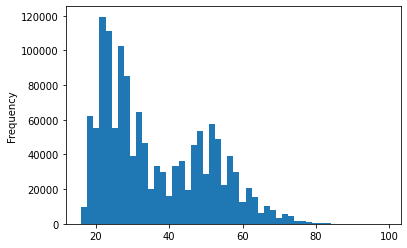

In [20]:
customers['age'].plot.hist(bins=50)
plt.show()

In [21]:
print(f"최소 나이 : {customers['age'].min()}")
print(f"최대 나이 : {customers['age'].max()}")

최소 나이 : 16.0
최대 나이 : 99.0


In [22]:
# 0 - 16~19 
# 1 - 20-29
# 2 - 30-39
# 3 - 40-49
# 4 - 50-59
# 5 - 60-

age_id = 0
age_group = pd.DataFrame(columns =["age","age_id"])
age=16

for i in range(45):
    if 15 < age < 20:
        temp_group = pd.DataFrame({"age":[age, age+1, age+2, age+3], "age_id":[age_id, age_id, age_id, age_id]})
        age_group = age_group.append(temp_group)
        age += 4
        age_id += 1
    elif 19 < age < 60 :
        temp_group = pd.DataFrame({"age":[age, age+1, age+2, age+3, age+4, age+5, age+6, age+7, age+8, age+9], "age_id":[age_id, age_id, age_id, age_id, age_id, age_id, age_id, age_id, age_id, age_id]})
        age_group = age_group.append(temp_group)
        age += 10
        age_id += 1
    else:
        temp_group = pd.DataFrame({"age":[age], "age_id":[age_id]})
        age_group = age_group.append(temp_group)
        age += 1

In [23]:
age_group

,age,age_id
0,16,0
1,17,0
2,18,0
3,19,0
0,20,1
1,21,1
2,22,1
3,23,1
4,24,1
5,25,1


In [24]:
def display_df(df, head=3):
    print(f'The shape of df is {df.shape}.\n')
    display(df.head(head))

In [25]:
# customers = customers.to_pandas()
# listBin = [-1, 16, 20, 30, 40, 50, 60, 100]
# customers['age_bins'] = pd.cut(customers['age'], listBin)
# display_df(customers, head=3)

In [26]:
customers = pd.merge(customers, age_group, on="age", how = "left")
customers = customers.drop(["FN", "Active", "club_member_status", "fashion_news_frequency", "postal_code"], axis=1)

In [27]:
# customers.drop(['age_id_x', 'age_id_y'], axis=1, inplace=True)

In [28]:
customers.head()

,customer_id,age,age_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,3
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,1
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,4
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,4


In [29]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [30]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [31]:
print(articles["index_group_name"].unique())
print(articles["index_group_no"].unique())

['Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided']
[ 1  4  3 26  2]


In [32]:
sex_category = articles[["index_group_no", "index_group_name"]].reset_index()
display(sex_category["index_group_name"].value_counts())

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

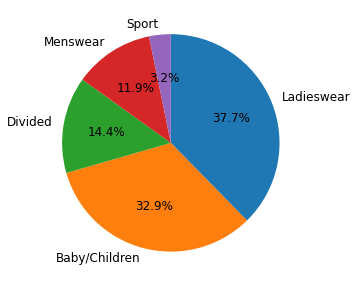

In [33]:
sex_category_list = sex_category["index_group_name"].value_counts().index.to_list()
plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 12
plt.pie(sex_category["index_group_name"].value_counts().sort_values(ascending=False), 
        labels = sex_category_list, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show()

In [34]:
articles_category_df = pd.DataFrame(articles[["article_id", "index_group_no"]])
articles_category_df.columns = ["article_id", "sex_attribute"]
articles_category_df.head()

,article_id,sex_attribute
0,108775015,1
1,108775044,1
2,108775051,1
3,110065001,1
4,110065002,1


In [35]:
transactions = pd.merge(transactions, articles_category_df, on = "article_id", how = "left")
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1


In [36]:
cust_sex = transactions[["customer_id", "sex_attribute", "article_id"]].groupby(["customer_id","sex_attribute"]).count().unstack()
cust_sex.columns = ["Woman", "Young", "Man", "kids", "Sports-person"]
cust_sex.head()

,Woman,Young,Man,kids,Sports-person
customer_id,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,13.0,2.0,1.0,5.0,NaN
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,62.0,19.0,NaN,4.0,1.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,12.0,1.0,4.0,NaN,1.0
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,NaN,NaN,NaN,NaN,2.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,11.0,NaN,NaN,NaN,2.0


In [37]:
%%time
cust_sex["attribute"] = cust_sex.apply(lambda x : list(x[x == x.max()].index), axis=1)

CPU times: user 4min 53s, sys: 18.2 s, total: 5min 11s
Wall time: 4min 41s


In [38]:
# cust_sex = temp_cust_set

In [39]:
cust_sex1 = pd.DataFrame(cust_sex[["attribute"]]).reset_index()
cust_sex1["attribute"] = cust_sex1["attribute"].apply(",".join).astype(str)
del cust_sex
cust_sex1.head()

,customer_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,Woman


In [40]:
cust_sex1['attribute'].unique()

array(['Woman', 'Sports-person', 'Young', 'Woman,Man', 'kids',
       'Woman,Young', 'Man', 'Young,Man', 'Woman,Sports-person',
       'Woman,Man,Sports-person', 'Woman,Young,Sports-person',
       'Woman,Young,Man', 'Man,Sports-person', 'Woman,kids', 'Young,kids',
       'Young,Sports-person', 'Man,kids', 'Woman,Man,kids',
       'Young,Man,Sports-person', 'kids,Sports-person',
       'Woman,Young,Man,Sports-person', 'Woman,Young,kids',
       'Woman,kids,Sports-person', 'Woman,Man,kids,Sports-person',
       'Young,kids,Sports-person', 'Young,Man,kids',
       'Woman,Young,Man,kids', 'Man,kids,Sports-person',
       'Woman,Young,kids,Sports-person', 'Young,Man,kids,Sports-person',
       'Woman,Young,Man,kids,Sports-person'], dtype=object)

In [41]:
cust_sex1.loc[~((cust_sex1["attribute"] == "Woman") |
               (cust_sex1["attribute"] == "Young")  |
               (cust_sex1["attribute"] == "Man")    |
               (cust_sex1["attribute"] == "kids") |
               (cust_sex1["attribute"] == "Sports-person")), "attribute"] = "Woman"
cust_sex1.head()

,customer_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,Woman


In [42]:
print(cust_sex1.attribute.unique())

['Woman' 'Sports-person' 'Young' 'kids' 'Man']


<function matplotlib.pyplot.show>

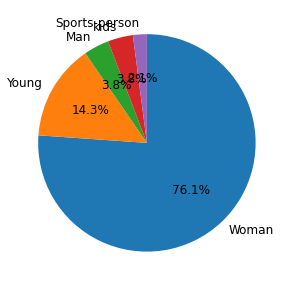

In [43]:
temp = cust_sex1["attribute"].value_counts().index.to_list()
plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 12
plt.pie(cust_sex1["attribute"].value_counts().sort_values(ascending=False), 
        labels = temp, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show

In [44]:
print(cust_sex1["attribute"].value_counts().sort_values(ascending=False))

Woman            1036847
Young             194984
Man                51281
kids               51128
Sports-person      28041
Name: attribute, dtype: int64


In [45]:
customers = pd.merge(customers, cust_sex1, on ="customer_id", how="left")
customers.head()

,customer_id,age,age_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,3,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,1,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,1,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,4,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,4,Woman


In [46]:
# customers.drop(['attribute_x', 'attribute_y'], axis=1, inplace=True)

In [47]:
customers.head()

,customer_id,age,age_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,3,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,1,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,1,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,4,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,4,Woman


In [48]:
customers.isnull().sum()

customer_id        0
age            15861
age_id         15861
attribute       9699
dtype: int64

In [49]:
# customers.rename(columns={"age_x" : "age"}, inplace=True)

In [50]:
customers["attribute"].fillna("Woman", inplace = True)

In [51]:
customers.isnull().sum()

customer_id        0
age            15861
age_id         15861
attribute          0
dtype: int64

In [52]:
age_mean = customers[["age", "attribute"]].groupby("attribute").mean().round().reset_index()
age_mean.columns = ["attribute", "age_mean"]
age_mean.head()

,attribute,age_mean
0,Man,39.0
1,Sports-person,37.0
2,Woman,37.0
3,Young,33.0
4,kids,41.0


In [53]:
customers.head()

,customer_id,age,age_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,3,Woman
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,1,Woman
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,1,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,4,Sports-person
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,4,Woman


In [54]:
customers = pd.merge(customers, age_mean, on = "attribute", how ="left")
customers.loc[(customers["age"].isnull()), "age"] = customers["age_mean"]
customers = customers.drop(["age_mean", "age_id"], axis =1)
customers = pd.merge(customers, age_group, on="age", how="left")
customers.isnull().sum()

customer_id    0
age            0
attribute      0
age_id         0
dtype: int64

In [55]:
transactions = pd.merge(transactions, customers, on ="customer_id", how ="left")
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
sex_attribute       0
age                 0
attribute           0
age_id              0
dtype: int64

In [56]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
 5   sex_attribute     int64  
 6   age               object 
 7   attribute         object 
 8   age_id            object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.4+ GB


In [57]:
transactions["t_dat"] = pd.to_datetime(transactions['t_dat'])
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,attribute,age_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1,24.0,Woman,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1,24.0,Woman,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2,32.0,Woman,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1,32.0,Woman,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1,32.0,Woman,2


In [58]:
transactions = transactions.loc[transactions.t_dat >= pd.to_datetime('2020-04-01')] #
transactions = transactions.loc[transactions.t_dat <= pd.to_datetime('2020-06-01')] #
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,attribute,age_id
23934157,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808001,0.067780,2,3,24.0,Woman,1
23934158,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808007,0.067780,2,3,24.0,Woman,1
23934159,2020-04-01,000563485cbb7850b0a93c6606f89c5b961c6647d1bd48...,567532015,0.042356,2,1,28.0,Woman,1
23934160,2020-04-01,000563485cbb7850b0a93c6606f89c5b961c6647d1bd48...,706104009,0.042356,2,1,28.0,Woman,1
23934161,2020-04-01,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,783504004,0.019051,2,1,29.0,Woman,1


In [59]:
transactions['attribute'].value_counts()

Woman            2420289
Young             249255
Man                46608
Sports-person      15442
kids               14187
Name: attribute, dtype: int64

In [60]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745781 entries, 23934157 to 26679937
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
 5   sex_attribute     int64         
 6   age               object        
 7   attribute         object        
 8   age_id            object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 209.5+ MB


In [61]:
transactions.article_id = ' ' + transactions.article_id.astype('str')
temp = transactions.groupby(['age_id','attribute','article_id'])['customer_id'].agg('count').reset_index()
temp.columns = ['age_id','attribute','article_id','count']
transactions = transactions.merge(temp, on=['age_id','attribute','article_id'], how='left')
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,attribute,age_id,count
0,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808001,0.067780,2,3,24.0,Woman,1,7
1,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808007,0.067780,2,3,24.0,Woman,1,13
2,2020-04-01,000563485cbb7850b0a93c6606f89c5b961c6647d1bd48...,567532015,0.042356,2,1,28.0,Woman,1,25
3,2020-04-01,000563485cbb7850b0a93c6606f89c5b961c6647d1bd48...,706104009,0.042356,2,1,28.0,Woman,1,19
4,2020-04-01,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,783504004,0.019051,2,1,29.0,Woman,1,62


In [62]:
transactions = transactions.sort_values(['count','t_dat'],ascending=False)
transactions = transactions.drop_duplicates(['age_id','attribute','article_id'])
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,attribute,age_id,count
2702819,2020-06-01,00c160fd797be9c52491373b16ec194d4edb129c57266e...,599580055,0.016932,2,1,24.0,Woman,1,3457
2706392,2020-06-01,14394caee60b3ebc3c111b66b28164e03a4c2ba247c14f...,741356002,0.033881,2,1,25.0,Woman,1,2404
2705250,2020-06-01,0db2f7adcaccca01e7bab8e45d190fcae8e303b5c0e66f...,610776002,0.008458,2,1,22.0,Woman,1,2395
2713171,2020-06-01,3d6a22635de50d59bfc99821eca77bad5d4ec2a9526377...,559630026,0.025407,1,1,24.0,Woman,1,2120
2704271,2020-06-01,082f15282383c3e2fa3c56425472242d877df90f0e9243...,684209027,0.025407,2,1,25.0,Woman,1,2090


In [63]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195000 entries, 2702819 to 39505
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   t_dat             195000 non-null  datetime64[ns]
 1   customer_id       195000 non-null  object        
 2   article_id        195000 non-null  object        
 3   price             195000 non-null  float64       
 4   sales_channel_id  195000 non-null  int64         
 5   sex_attribute     195000 non-null  int64         
 6   age               195000 non-null  object        
 7   attribute         195000 non-null  object        
 8   age_id            195000 non-null  object        
 9   count             195000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 16.4+ MB


In [64]:
from PIL import Image

In [65]:
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(f"images/{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass

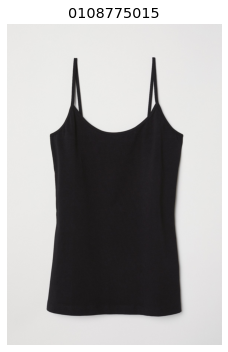

In [66]:
show_images("0108775015")

In [67]:
recommend_sex_age = pd.DataFrame(transactions.groupby(["age_id", "attribute"]).article_id.sum().reset_index())
recommend_sex_age["len"] = recommend_sex_age["article_id"].apply(lambda x : len(x))
recommend_sex_age.head()

,age_id,attribute,article_id,len
0,0,Man,685816001 685816002 685816041 685813003 68581...,8690
1,0,Sports-person,720125001 484398001 854043005 852174001 72012...,2780
2,0,Woman,599580055 741356002 684209027 684209013 55963...,100050
3,0,Young,759871001 759871002 706016001 706016002 75946...,59620
4,0,kids,869399003 816790005 796735001 644288001 83247...,750


In [68]:
len(recommend_sex_age[['article_id']].index)

30

In [69]:
article_id_five = pd.DataFrame(columns=["article_id"])

In [70]:
article_id_five

,article_id


In [71]:
for i in range(30):
  temp_article = pd.DataFrame({"article_id" : " ".join(recommend_sex_age[['article_id']].iloc[i, 0].split()[:5])}, index = [0])
  article_id_five = article_id_five.append(temp_article)

In [72]:
article_id_five = article_id_five.iloc[:30,0]

In [73]:
article_id_five = pd.DataFrame(article_id_five, columns=["article_id"])

In [74]:
article_id_five = article_id_five.reset_index()

In [75]:
temps=recommend_sex_age.drop(columns=["article_id", "len"])

In [76]:
temps

,age_id,attribute
0,0,Man
1,0,Sports-person
2,0,Woman
3,0,Young
4,0,kids
5,1,Man
6,1,Sports-person
7,1,Woman
8,1,Young
9,1,kids


In [77]:
recommend_sex_age = pd.concat([temps, article_id_five], axis = 1)
recommend_sex_age = recommend_sex_age.drop(columns=["index"])

In [78]:
recommend_sex_age

,age_id,attribute,article_id
0,0,Man,685816001 685816002 685816041 685813003 685816023
1,0,Sports-person,720125001 484398001 854043005 852174001 720125039
2,0,Woman,599580055 741356002 684209027 684209013 559630026
3,0,Young,759871001 759871002 706016001 706016002 759465001
4,0,kids,869399003 816790005 796735001 644288001 832473003
5,1,Man,685816002 685816001 608945001 685816041 685814003
6,1,Sports-person,720125001 854043005 852174001 831568001 810838010
7,1,Woman,599580055 741356002 610776002 559630026 684209027
8,1,Young,706016001 759871002 759871001 706016002 759465001
9,1,kids,694298008 701784017 833485002 694298019 696178017


In [81]:
recommend_sex_age.to_csv('age_id&attribute&article_id.csv')

In [ ]:
recommend_sex_age['attribute']

0               Man
1     Sports-person
2             Woman
3             Young
4              kids
5               Man
6     Sports-person
7             Woman
8             Young
9              kids
10              Man
11    Sports-person
12            Woman
13            Young
14             kids
15              Man
16    Sports-person
17            Woman
18            Young
19             kids
20              Man
21    Sports-person
22            Woman
23            Young
24             kids
25              Man
26    Sports-person
27            Woman
28            Young
29             kids
Name: attribute, dtype: object

In [ ]:
for i in range(15):
  show_images(recommend_sex_age.iloc[i,2].split(), 5)

Output hidden; open in https://colab.research.google.com to view.

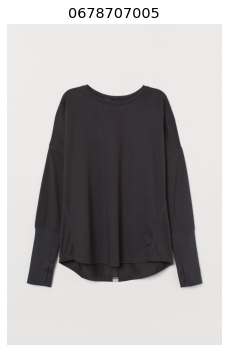

In [ ]:
show_images("678707005")